# **INTRODUCTION TO `pandas`**
---
 <br>
 
- Copyright (c) Lukas Gonon, 2024. All rights reserved

- Author: Lukas Gonon <l.gonon@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

 **Origins**
 
 `pandas` was originally developed by [Wes McKinney](https://wesmckinney.com) while at AQR Capital in 2007-2010.

# Introduction to DataFrames

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Create a Dataframe with dates

We start by creating series of Gaussian distributed values.

In [2]:
N = 10000 ## size of the dataframe

In [3]:
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head() ## Print the top five rows

0         1         2         3         4
0  1.331895 -0.044893  0.092488 -0.387881 -0.383811
1  0.536356  0.315970 -0.474839 -0.668440  2.043292
2  0.189367  1.819962  0.206184 -0.188530 -0.342552
3  1.090023 -0.731590 -1.913548 -0.064646 -0.480024
4 -0.804195 -0.236833  0.085534 -0.754642  0.218660

In [6]:
df.tail() ## Print the bottom five rows

0         1         2         3         4
9995  0.342495 -0.847720  0.054640  0.899590 -1.273607
9996  0.135340  0.932194  1.596466 -1.063615  0.323797
9997  1.459522 -0.483820 -0.212929  1.169705  2.619618
9998 -2.301264  1.164021 -1.349302  0.310449  1.445667
9999 -0.940613 -0.648424  0.813396  1.010441 -0.219320

In [7]:
df.columns = ["Series 1", "Series 2", "Series 3", "Series 4", "Series 5"]
## Or more concisely:
#df.columns = ["Series %s" % i  for i in range(1,6)]
df.head()

Series 1  Series 2  Series 3  Series 4  Series 5
0  1.331895 -0.044893  0.092488 -0.387881 -0.383811
1  0.536356  0.315970 -0.474839 -0.668440  2.043292
2  0.189367  1.819962  0.206184 -0.188530 -0.342552
3  1.090023 -0.731590 -1.913548 -0.064646 -0.480024
4 -0.804195 -0.236833  0.085534 -0.754642  0.218660

Note that the index (first column on the left) has no real meaning here. 
However, in practice, thinking of each of the columns as a time series, it may represent dates. 
We re-index the whole dataframe with this in mind.

#### Specifying a start date

In [8]:
startYear = '2018'
startMonth = '01'
startDay = '01'
startDate = startYear + "-" + startMonth + "-" + startDay ## string concatenation
print("Start date: ", startDate)

Start date:  2018-01-01


In [9]:
dates = pd.date_range(startDate, periods=N, freq="D")
df.index = dates
df.index.name = 'Date'
df.head()

Series 1  Series 2  Series 3  Series 4  Series 5
Date                                                        
2018-01-01  1.331895 -0.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  0.315970 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  1.819962  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -0.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -0.236833  0.085534 -0.754642  0.218660

## Basic dataframe manipulations

In [10]:
df.keys()

Index(['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5'], dtype='object')

An Index is a `pandas` class for an immutable sequence, which is the basis for axes.

In [11]:
print('Names of columns:', [d for d in df.keys().values])
## similarly df.columns

Names of columns: ['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5']


Overview of the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2018-01-01 to 2045-05-18
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Series 1  10000 non-null  float64
 1   Series 2  10000 non-null  float64
 2   Series 3  10000 non-null  float64
 3   Series 4  10000 non-null  float64
 4   Series 5  10000 non-null  float64
dtypes: float64(5)
memory usage: 468.8 KB


Basic statistics

In [13]:
df.describe()

Series 1      Series 2      Series 3      Series 4      Series 5
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean      -0.003245      0.012179      0.007560     -0.004239     -0.010031
std        0.994126      0.995683      1.004207      1.010267      1.006516
min       -3.647973     -3.794491     -3.771629     -3.690539     -4.146722
25%       -0.675338     -0.650416     -0.656775     -0.681388     -0.680058
50%       -0.015786     -0.001388      0.010271     -0.007992     -0.010877
75%        0.671473      0.671355      0.685175      0.682518      0.672764
max        3.581483      4.062420      4.063544      3.580953      3.792696

## Accessing elements from a dataframe

A  DataFrame may be indexed like an array, specifying the row and column number using .iloc (index location).
The location can be called either by the index number or by its name.

In [14]:
df.head()

Series 1  Series 2  Series 3  Series 4  Series 5
Date                                                        
2018-01-01  1.331895 -0.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  0.315970 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  1.819962  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -0.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -0.236833  0.085534 -0.754642  0.218660

In [15]:
print("First row, second column: ", df.iloc[0, 1], " or ", df.loc[startDate, 'Series 2'])

First row, second column:  -0.044892541138373855  or  -0.044892541138373855


In [16]:
myRow = df.iloc[2,:]
print(myRow)
print("Type: ", type(myRow))

Series 1    0.189367
Series 2    1.819962
Series 3    0.206184
Series 4   -0.188530
Series 5   -0.342552
Name: 2018-01-03 00:00:00, dtype: float64
Type:  <class 'pandas.core.series.Series'>


Equivalently:

In [17]:
myRow = df.loc['2018-01-03']
print(myRow, type(myRow))

Series 1    0.189367
Series 2    1.819962
Series 3    0.206184
Series 4   -0.188530
Series 5   -0.342552
Name: 2018-01-03 00:00:00, dtype: float64 <class 'pandas.core.series.Series'>


In [18]:
print("Accessing elements by slicing over columns: ")
print(df.iloc[0, 1:3])
print(type(df.iloc[0, 1:3]))

Accessing elements by slicing over columns: 
Series 2   -0.044893
Series 3    0.092488
Name: 2018-01-01 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


In [19]:
print("Accessing elements by slicing over rows: ")
print(df.iloc[10:14, 1])
print(type(df.iloc[10:14, 1]))

Accessing elements by slicing over rows: 
Date
2018-01-11   -1.209646
2018-01-12   -0.695166
2018-01-13   -0.114546
2018-01-14    0.671310
Freq: D, Name: Series 2, dtype: float64
<class 'pandas.core.series.Series'>


In [20]:
print("Accessing elements by slicing over boths: ")
print(df.iloc[10:14, 1:3])
print(type(df.iloc[10:14, 1:3]))

Accessing elements by slicing over boths: 
            Series 2  Series 3
Date                          
2018-01-11 -1.209646 -1.375617
2018-01-12 -0.695166 -0.008623
2018-01-13 -0.114546  0.734451
2018-01-14  0.671310  0.930553
<class 'pandas.core.frame.DataFrame'>


Question: What are the types of the following objects:
- df.iloc[2]
- df.iloc[2].values
- [d for d in df.iloc[2]]

In [21]:
print(type(df.iloc[2]))
print(type(df.iloc[2].values))
print(type([d for d in df.iloc[2]]))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'list'>


### `.at` and `.iat`

These two commands are very similar to `.loc` and `.iloc`, and are actually faster, but slicing is not permitted.

In [22]:
%timeit df.iloc[10, 2]
%timeit df.iat[10, 2]

22.8 µs ± 947 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
16.3 µs ± 631 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
try:
    df.iat[10, 2:4]
except:
    print('error')

error


### Extract elements with conditions

In [24]:
mySeriesName = "Series 2"
df[df[mySeriesName] > 3.4]

Series 1  Series 2  Series 3  Series 4  Series 5
Date                                                        
2036-08-31 -1.222720  4.062420  1.301918  0.542153  0.547573
2036-12-01  1.011645  3.500964 -0.891991  0.220253 -0.993091
2043-12-15  0.054495  3.678137  0.997098 -2.128494 -0.309987

Note that the series `df` has not been modified. Only a copy has been printed!!

In [25]:
mySeries =  df[mySeriesName][df[mySeriesName] > 3.4]
mySeries

Date
2036-08-31    4.062420
2036-12-01    3.500964
2043-12-15    3.678137
Name: Series 2, dtype: float64

We can return the series only as a list:

In [26]:
print(mySeries.values)

[4.06241989 3.50096362 3.67813654]


### User-defined functions

In [27]:
df = df
df.head()

Series 1  Series 2  Series 3  Series 4  Series 5
Date                                                        
2018-01-01  1.331895 -0.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  0.315970 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  1.819962  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -0.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -0.236833  0.085534 -0.754642  0.218660

Here, the original dataframe has been modified!

In [28]:
def myFunction(x, param):
    return x - param

df[mySeriesName] = df[mySeriesName].apply(myFunction, args=(10,))
df.head()

Series 1   Series 2  Series 3  Series 4  Series 5
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  -9.684030 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660

## Numpy on dataframe

This is where the power of the DataFrame comes into the picture, namely that operations need to be performed element by element, 
but apply to a whole series (column) at once.

In [29]:
myIndex = input("Series index")

Series index1


In [30]:
ser = 'Series ' + myIndex
print('Maximum on the first Series:', df[ser].max())
print('Date (index) where this maximum is attained:', df[ser].argmax()) ## deprecated
print('Date where this maximum is attained:', df[ser].idxmax(), df.index[df[ser].argmax()])
print('Mean of the first series:', df[ser].mean())

Maximum on the first Series: 3.581483179615663
Date (index) where this maximum is attained: 4932
Date where this maximum is attained: 2031-07-04 00:00:00 2031-07-04 00:00:00
Mean of the first series: -0.003244788153805063


We can also obtain general results about the whole dataframe / each series in the dataframe:

In [31]:
df.mean()

Series 1   -0.003245
Series 2   -9.987821
Series 3    0.007560
Series 4   -0.004239
Series 5   -0.010031
dtype: float64

## Plotting Dataframes

##### Plot all the time series

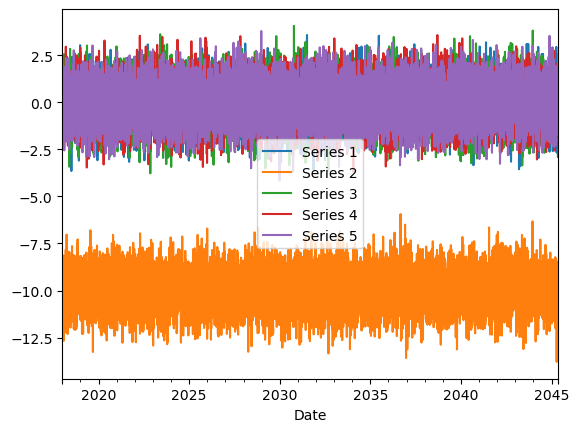

In [32]:
df.plot();

**WHAT IS WRONG ABOUT THE PLOT?**

##### Plot one column at a time

In [33]:
df[ser].plot(legend=ser);

##### Changing the type of plots

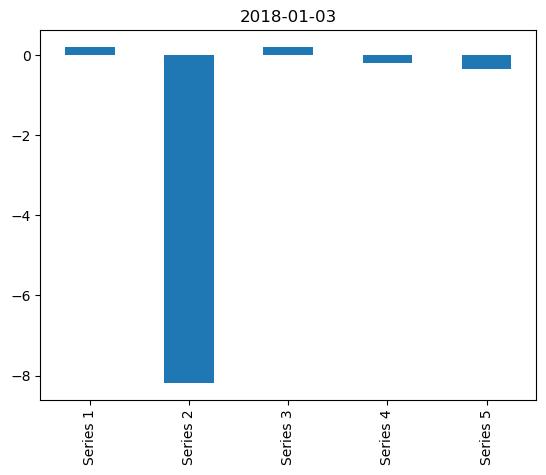

In [34]:
datePlot = '2018-01-03'
df.loc[datePlot].plot(kind='bar', title=datePlot); ## for one particular day

## Sorting DataFrames

In [35]:
print('Data sorted by ' + ser)
df.sort_values(by=ser).head()

Data sorted by Series 1


Series 1   Series 2  Series 3  Series 4  Series 5
Date                                                         
2018-07-02 -3.647973 -11.067504  0.062670  0.377030 -0.527530
2031-11-13 -3.586640 -11.222045  0.104983 -0.331613  0.820004
2043-03-17 -3.555023  -8.604980  1.959158  0.102685  1.012866
2043-04-12 -3.391625 -11.065102 -0.831092  1.516007  0.926051
2040-09-09 -3.340239 -10.168852 -1.363427 -1.819094 -0.263404

*WARNING: the dataframe df itself has remained unchanged though...*

In [36]:
df.head()

Series 1   Series 2  Series 3  Series 4  Series 5
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  -9.684030 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660

## Renaming columns

In [37]:
df.rename(columns={'Series 1': 'SPX', 
                   'Series 2': 'DAX', 
                   'Series 3': 'GOOGL', 
                   'Series 4': 'AAPL', 
                   'Series 5': 'VIX'}, inplace=True)
df.head()

SPX        DAX     GOOGL      AAPL       VIX
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  -9.684030 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660

### A note on copies on slices....

In [38]:
df.head()

SPX        DAX     GOOGL      AAPL       VIX
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  -9.684030 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660

In [39]:
val = df.iloc[1,0]
val

0.5363564375516118

In [40]:
df[df["SPX"] == val]["DAX"] = 0.
df

C:\Users\lukas\AppData\Local\Temp\ipykernel_10972\3746132791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["SPX"] == val]["DAX"] = 0.


SPX        DAX     GOOGL      AAPL       VIX
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356  -9.684030 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660
...              ...        ...       ...       ...       ...
2045-05-14  0.342495 -10.847720  0.054640  0.899590 -1.273607
2045-05-15  0.135340  -9.067806  1.596466 -1.063615  0.323797
2045-05-16  1.459522 -10.483820 -0.212929  1.169705  2.619618
2045-05-17 -2.301264  -8.835979 -1.349302  0.310449  1.445667
2045-05-18 -0.940613 -10.648424  0.813396  1.010441 -0.219320

[10000 rows x 5 columns]

In [41]:
df.loc[df["SPX"] == val, "DAX"] = 0.
df

SPX        DAX     GOOGL      AAPL       VIX
Date                                                         
2018-01-01  1.331895 -10.044893  0.092488 -0.387881 -0.383811
2018-01-02  0.536356   0.000000 -0.474839 -0.668440  2.043292
2018-01-03  0.189367  -8.180038  0.206184 -0.188530 -0.342552
2018-01-04  1.090023 -10.731590 -1.913548 -0.064646 -0.480024
2018-01-05 -0.804195 -10.236833  0.085534 -0.754642  0.218660
...              ...        ...       ...       ...       ...
2045-05-14  0.342495 -10.847720  0.054640  0.899590 -1.273607
2045-05-15  0.135340  -9.067806  1.596466 -1.063615  0.323797
2045-05-16  1.459522 -10.483820 -0.212929  1.169705  2.619618
2045-05-17 -2.301264  -8.835979 -1.349302  0.310449  1.445667
2045-05-18 -0.940613 -10.648424  0.813396  1.010441 -0.219320

[10000 rows x 5 columns]

# Working with real data

## Financial data from Yahoo Finance

In [42]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pylab as plt

In [43]:
ticker = "AAPL"
#aapl = pdr.DataReader(ticker, 'yahoo', '1980-01-01')
aapl = pd.read_csv("data/apple.csv")
aapl.head()

Date      High       Low      Open     Close       Volume  Adj Close
0  2000-01-03  4.017857  3.631696  3.745536  3.997768  133949200.0   2.677157
1  2000-01-04  3.950893  3.613839  3.866071  3.660714  128094400.0   2.451444
2  2000-01-05  3.948661  3.678571  3.705357  3.714286  194580400.0   2.487319
3  2000-01-06  3.821429  3.392857  3.790179  3.392857  191993200.0   2.272070
4  2000-01-07  3.607143  3.410714  3.446429  3.553571  115183600.0   2.379695

In [44]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771 entries, 0 to 4770
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4771 non-null   object 
 1   High       4771 non-null   float64
 2   Low        4771 non-null   float64
 3   Open       4771 non-null   float64
 4   Close      4771 non-null   float64
 5   Volume     4771 non-null   float64
 6   Adj Close  4771 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.0+ KB


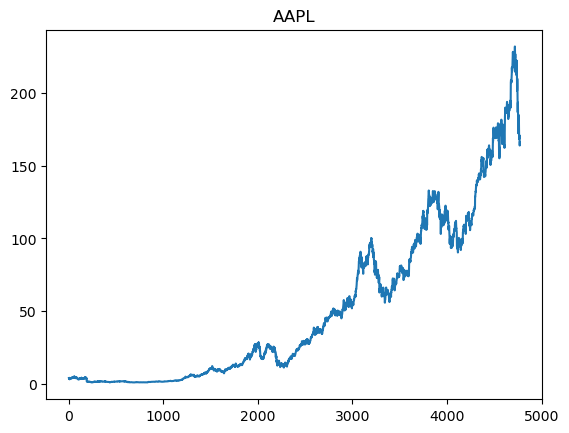

In [45]:
#aapl["Open"][1000:3000].plot(title=ticker)
aapl["Close"].plot(title=ticker)
plt.show()

## Economics Data from FRED

In [46]:
from datetime import date
series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred' # FED Economic Data Service
start = date(1962, 1, 1)
myData = pdr.DataReader(series_code, data_source, start)

In [47]:
myData.head()

DGS10
DATE             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
1962-01-08   4.03

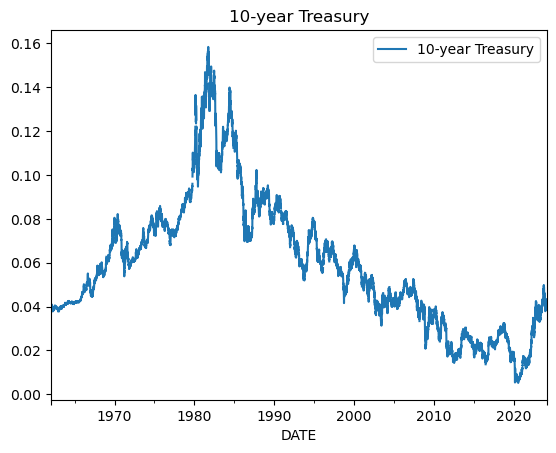

In [48]:
myData = myData / 100.
series_name = '10-year Treasury'
myData = myData.rename(columns={series_code: series_name})
myData.plot(title=series_name)
plt.show() 

## Analysing real data

In [58]:
ticker = "^GSPC" ## S&P500 
spx = pd.read_csv("data/spx_daily.csv")
#pdr.DataReader(ticker, 'yahoo', '1980-01-01')
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date;Open;High;Low;Close;Adj Close;Volume  5799 non-null   object
dtypes: object(1)
memory usage: 45.4+ KB


In [59]:
spx.head()

Date;Open;High;Low;Close;Adj Close;Volume
0  2000-01-03;148.25;148.25;143.875;145.4375;94.5...
1  2000-01-04;143.53125;144.0625;139.640625;139.7...
2  2000-01-05;139.9375;141.53125;137.25;140.0;91....
3  2000-01-06;139.625;141.5;137.75;137.75;89.5949...
4  2000-01-07;140.3125;145.75;140.0625;145.75;94....

In [60]:
spx['Close'].plot(figsize=(8, 5), grid=True);

KeyError: 'Close'

In [68]:
ticker = "^GSPC" ## S&P500 
spx = pd.read_csv("data/spx_daily.csv",delimiter=";")
#pdr.DataReader(ticker, 'yahoo', '1980-01-01')
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5799 entries, 0 to 5798
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5799 non-null   object 
 1   Open       5799 non-null   float64
 2   High       5799 non-null   float64
 3   Low        5799 non-null   float64
 4   Close      5799 non-null   float64
 5   Adj Close  5799 non-null   float64
 6   Volume     5799 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 317.3+ KB


In [69]:
spx.head()

Date       Open       High         Low     Close  Adj Close    Volume
0  2000-01-03  148.25000  148.25000  143.875000  145.4375  94.595108   8164300
1  2000-01-04  143.53125  144.06250  139.640625  139.7500  90.895828   8089800
2  2000-01-05  139.93750  141.53125  137.250000  140.0000  91.058418  12177900
3  2000-01-06  139.62500  141.50000  137.750000  137.7500  89.594955   6227200
4  2000-01-07  140.31250  145.75000  140.062500  145.7500  94.798302   8066500

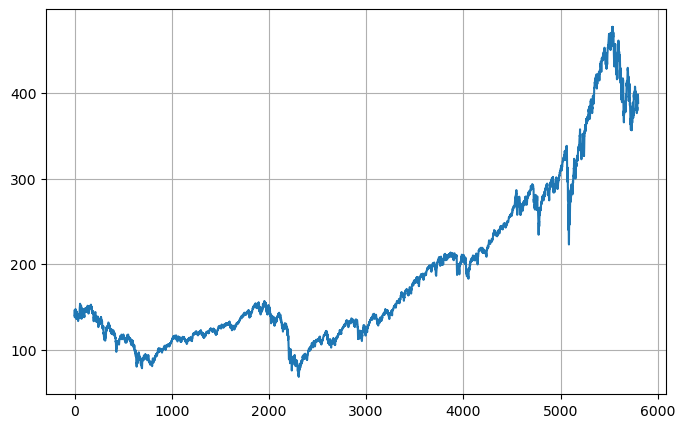

In [70]:
spx['Close'].plot(figsize=(8, 5), grid=True);

### A quick note on computation time -- computing daily returns

In [71]:
len(spx)

5799

In [72]:
%%time
spx['ReturnsLoop'] = 0.
for i in range(1, len(spx)):
    spx['ReturnsLoop'][i] = np.log(spx['Close'][i] / spx['Close'][i - 1])

<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 1.24 s


In [73]:
spx[['Close', 'ReturnsLoop']].head()

Close  ReturnsLoop
0  145.4375     0.000000
1  139.7500    -0.039891
2  140.0000     0.001787
3  137.7500    -0.016202
4  145.7500     0.056452

In [74]:
%time spx['Returns'] = np.log(spx['Close'] / spx['Close'].shift(1))
spx[['Close', 'Returns']].head()

Wall time: 0 ns


Close   Returns
0  145.4375       NaN
1  139.7500 -0.039891
2  140.0000  0.001787
3  137.7500 -0.016202
4  145.7500  0.056452

In [75]:
del spx['ReturnsLoop']

In [76]:
spx.dropna()
spx.head()

Date       Open       High         Low     Close  Adj Close  \
0  2000-01-03  148.25000  148.25000  143.875000  145.4375  94.595108   
1  2000-01-04  143.53125  144.06250  139.640625  139.7500  90.895828   
2  2000-01-05  139.93750  141.53125  137.250000  140.0000  91.058418   
3  2000-01-06  139.62500  141.50000  137.750000  137.7500  89.594955   
4  2000-01-07  140.31250  145.75000  140.062500  145.7500  94.798302   

     Volume   Returns  
0   8164300       NaN  
1   8089800 -0.039891  
2  12177900  0.001787  
3   6227200 -0.016202  
4   8066500  0.056452

In [77]:
val = spx.iloc[0,0]
val

'2000-01-03'

### Data analysis

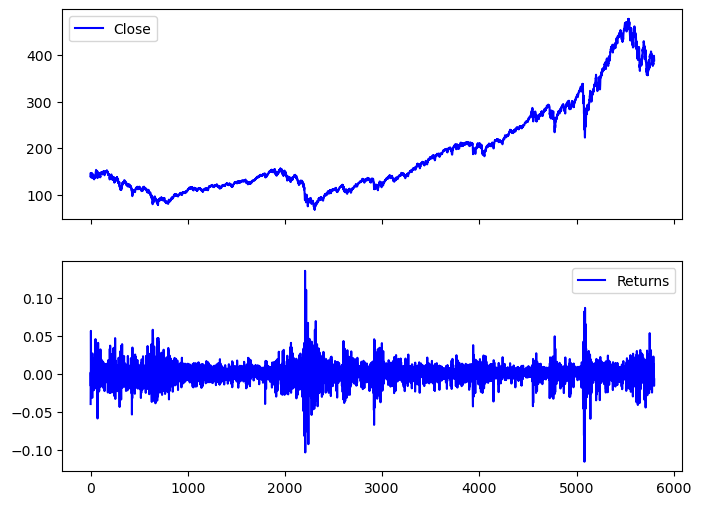

In [78]:
spx[['Close', 'Returns']].plot(subplots=True, style='b',figsize=(8, 6));

**Remarks:**
- Volatility clustering
- Leverage effect

### Moving averages

In [79]:
n1, n2 = 24, 252
MA1, MA2 = 'MA' + str(n1) + 'd', 'MA' + str(n2) + 'd'
spx[MA1] = spx['Close'].rolling(window=n1, center = False).mean()
spx[MA2] = spx['Close'].rolling(window=n2, center = False).mean()
spx.tail()

Date        Open        High         Low       Close   Adj Close  \
5794  2023-01-12  396.670013  398.489990  392.420013  396.959991  393.987244   
5795  2023-01-13  393.619995  399.100006  393.339996  398.500000  395.515717   
5796  2023-01-17  398.480011  400.230011  397.059998  397.769989  394.791168   
5797  2023-01-18  399.010010  400.119995  391.279999  391.489990  388.558228   
5798  2023-01-19  389.359985  391.079987  387.260010  388.640015  385.729584   

        Volume   Returns       MA24d      MA252d  
5794  90157700  0.003634  387.502082  406.517025  
5795  63903900  0.003872  387.596249  406.229247  
5796  62677300 -0.001834  387.783332  405.964326  
5797  99632300 -0.015914  387.472497  405.673731  
5798  86958900 -0.007306  386.917081  405.404485

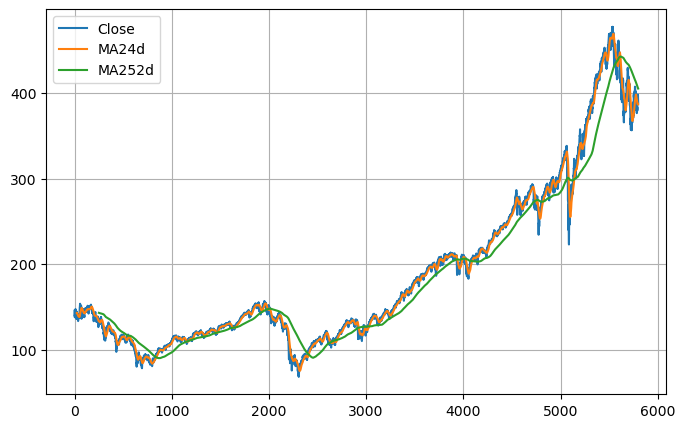

In [80]:
spx[['Close', MA1, MA2]].plot(figsize=(8, 5), grid=True);

In [81]:
spx['MovingReturnsVol'] = spx['Returns'].rolling(window=252).std() * np.sqrt(252.)

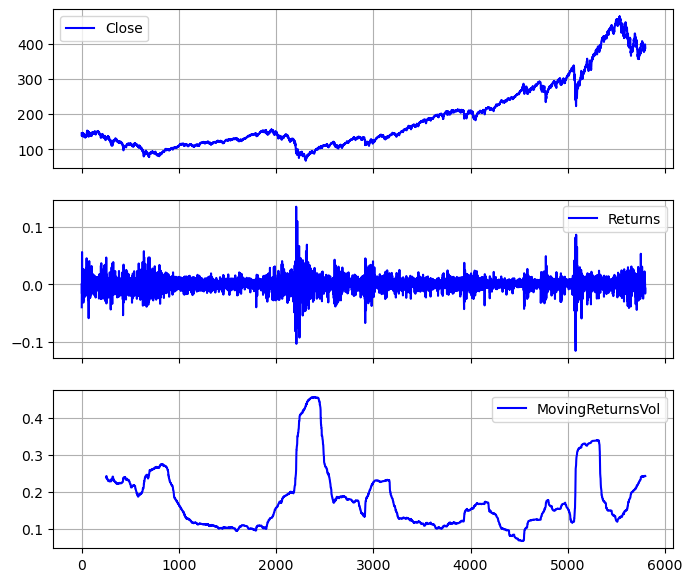

In [82]:
spx[['Close', 'Returns', 'MovingReturnsVol']].plot(subplots=True, style='b',figsize=(8, 7), grid=True);

# The `groupby` command

In [83]:
import pandas as pd

df = pd.read_csv('data/Class.csv')
df.head()

Name      Grade Nationality Gender
0     John  81.791817       China      M
1      Joe  96.101421          UK      M
2     Jack  96.466640      France      F
3      Ben  93.981908          US      M
4  Cynthia  53.858965       Japan      M

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         35 non-null     object 
 1   Grade        35 non-null     float64
 2   Nationality  35 non-null     object 
 3   Gender       35 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [85]:
df["Grade"].mean()

75.78772944914284

In [86]:
df["Grade"].sum()# / len(df.index)

2652.57053072

In [87]:
df.groupby(['Nationality']).agg({'Grade': 'mean'})

Grade
Nationality           
Cambodia     73.970554
China        72.109283
France       73.727389
German       78.613666
Japan        71.400133
Korea        76.892591
UK           74.029734
US           85.262760
Vietnam      72.649608

In [88]:
df.groupby(['Nationality']).agg({'Grade': 'sum'})

Grade
Nationality            
Cambodia     147.941108
China        576.874264
France       147.454778
German       157.227331
Japan        357.000665
Korea        153.785183
UK           370.148668
US           596.839317
Vietnam      145.299216

In [89]:
df.groupby(['Nationality', 'Gender']).agg({'Grade': 'sum'})#.sum()

Grade
Nationality Gender            
Cambodia    F        55.248696
            M        92.692412
China       F       127.833955
            M       449.040309
France      F       147.454778
German      F        68.975979
            M        88.251352
Japan       M       357.000665
Korea       M       153.785183
UK          F       274.047247
            M        96.101421
US          F       156.859866
            M       439.979451
Vietnam     F        66.581475
            M        78.717741

# Merge, join, concatenate data -- an example with the MTA database

NYC map: https://www.google.com/maps/place/New+York,+NY,+USA/@40.6976684,-74.2605634,10z/data=!3m1!4b1!4m5!3m4!1s0x89c24fa5d33f083b:0xc80b8f06e177fe62!8m2!3d40.7127753!4d-74.0059728


Data: http://web.mta.info/developers/turnstile.html



### Importing and looking at the data

In [90]:
import datetime as dt
import pandas as pd

In [91]:
url  = r'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180825.txt'
df = pd.read_csv(url)#, index_col=0, header=0, parse_dates=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197380 entries, 0 to 197379
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   197380 non-null  object
 1   UNIT                                                                  197380 non-null  object
 2   SCP                                                                   197380 non-null  object
 3   STATION                                                               197380 non-null  object
 4   LINENAME                                                              197380 non-null  object
 5   DIVISION                                                              197380 non-null  object
 6   DATE                                                                  197380 non-null  objec

In [93]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/18/2018  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  6728354   
1  REGULAR  6728373   
2  REGULAR  6728388   
3  REGULAR  6728469   
4  REGULAR  6728665   

   EXITS                                                                 
0                                            2280604                     
1                                            2280609                     
2                                            2280634                     
3                                            2280669                     
4                                            2280681

In [94]:
#!pip install xlrd

In [95]:
url  = r'http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls'
infoStations = pd.read_excel(url)#, index_col=0, header=0, parse_dates=True)
infoStations.head()

Remote  Booth       Station Line Name Division
0   R001   A060  WHITEHALL ST        R1      BMT
1   R001   A058  WHITEHALL ST        R1      BMT
2   R001  R101S   SOUTH FERRY        R1      IRT
3   R002   A077     FULTON ST  ACJZ2345      BMT
4   R002   A081     FULTON ST  ACJZ2345      BMT

### Cleaning the data

In [96]:
df['ENTRIES'].max()

2129780411

In [97]:
df['EXITS'].max()

KeyError: 'EXITS'

In [98]:
df.keys()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [99]:
df.columns = ['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date','time', 'desc', 'entries','exits']

In [100]:
df['exits'].max()

2062568997

In [101]:
#df["date"] = pd.to_datetime(df["date"] + " " + df["time"])
df["date"] = pd.to_datetime(df["date"])
df.head()

ca  unit       scp station linename division       date      time  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-18  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-18  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-18  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-18  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-08-18  16:00:00   

      desc  entries    exits  
0  REGULAR  6728354  2280604  
1  REGULAR  6728373  2280609  
2  REGULAR  6728388  2280634  
3  REGULAR  6728469  2280669  
4  REGULAR  6728665  2280681

### Counting daily traffic using `groupbby`

In [102]:
df_entries = df.groupby(['station','ca','unit','scp','date']).entries.max() - df.groupby(['station','ca','unit','scp','date']).entries.min()
df_exits = df.groupby(['station','ca','unit','scp','date']).exits.max() - df.groupby(['station','ca','unit','scp','date']).exits.min()
print("Types: ", type(df_entries), type(df_exits))

Types:  <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [103]:
df_entries

station    ca    unit  scp       date      
1 AV       H007  R248  00-00-00  2018-08-18    1759
                                 2018-08-19    1461
                                 2018-08-20    2704
                                 2018-08-21    3002
                                 2018-08-22    3033
                                               ... 
ZEREGA AV  R419  R326  00-05-01  2018-08-20       0
                                 2018-08-21       0
                                 2018-08-22       0
                                 2018-08-23       0
                                 2018-08-24       0
Name: entries, Length: 32559, dtype: int64

We are now going to merge `df_entries` and `df_exits`. However, they need to have the same index.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [104]:
df_entries_flat = df_entries.reset_index()
df_exits_flat = df_exits.reset_index()

df_traffic = pd.merge(df_entries_flat, df_exits_flat, how='outer')

df_traffic['day'] = df_traffic['date'].dt.day_name()
df_traffic['traffic'] = df_traffic['entries'] + df_traffic['exits']

In [105]:
df_traffic.head()

station    ca  unit       scp       date  entries  exits        day  traffic
0    1 AV  H007  R248  00-00-00 2018-08-18     1759   2377   Saturday     4136
1    1 AV  H007  R248  00-00-00 2018-08-19     1461   2074     Sunday     3535
2    1 AV  H007  R248  00-00-00 2018-08-20     2704   3417     Monday     6121
3    1 AV  H007  R248  00-00-00 2018-08-21     3002   3488    Tuesday     6490
4    1 AV  H007  R248  00-00-00 2018-08-22     3033   3451  Wednesday     6484

In [106]:
df_traffic.describe()

entries         exits       traffic
count  3.255900e+04  3.255900e+04  3.255900e+04
mean   5.585258e+04  6.098161e+04  1.168342e+05
std    8.218440e+06  1.011603e+07  1.828231e+07
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.170000e+02  1.220000e+02  5.010000e+02
50%    6.680000e+02  4.150000e+02  1.251000e+03
75%    1.312000e+03  9.395000e+02  2.286000e+03
max    1.448534e+09  1.821581e+09  3.270114e+09

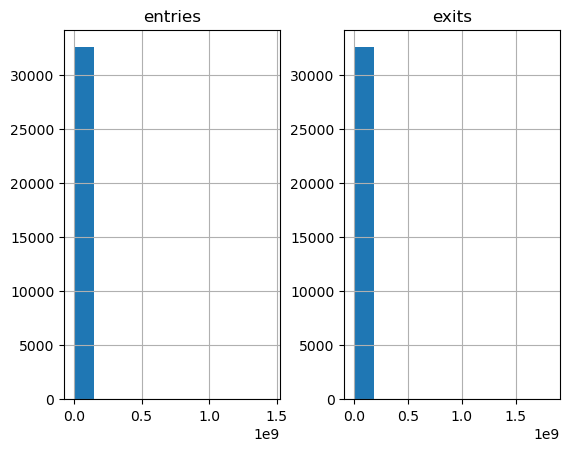

In [107]:
df_traffic[["entries", "exits"]].hist();

In [108]:
thresholdMax = 25000
df_traffic = df_traffic[df_traffic["traffic"] < thresholdMax]

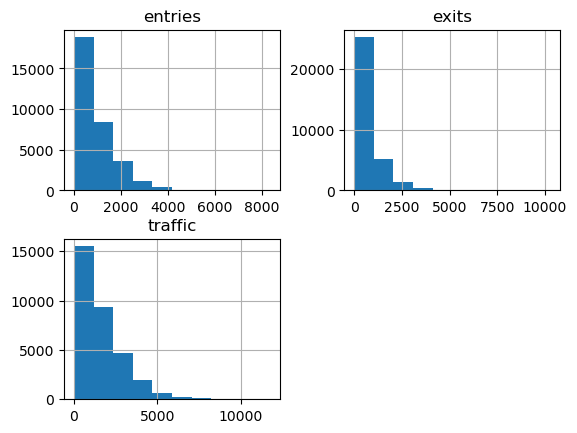

In [109]:
df_traffic[["entries", "exits", "traffic"]].hist();

Final steps

In [110]:
df_station = df_traffic.groupby(['station','date','day']).sum().reset_index()
df_station.head()

station       date        day  entries  exits  traffic
0    1 AV 2018-08-18   Saturday    10105  11904    22009
1    1 AV 2018-08-19     Sunday     8349  10070    18419
2    1 AV 2018-08-20     Monday    14392  16478    30870
3    1 AV 2018-08-21    Tuesday    15023  16567    31590
4    1 AV 2018-08-22  Wednesday    15377  17217    32594

### What happens at a specific station?

In [111]:
df_station["station"].unique()

array(['1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '138/GRAND CONC', '14 ST', '14 ST-UNION SQ',
       '145 ST', '149/GRAND CONC', '14TH STREET', '15 ST-PROSPECT',
       '155 ST', '157 ST', '161/YANKEE STAD', '167 ST', '168 ST',
       '169 ST', '170 ST', '174 ST', '175 ST', '176 ST', '18 AV', '18 ST',
       '181 ST', '182-183 STS', '183 ST', '190 ST', '191 ST', '2 AV',
       '20 AV', '207 ST', '21 ST', '21 ST-QNSBRIDGE', '215 ST', '219 ST',
       '225 ST', '23 ST', '231 ST', '233 ST', '238 ST', '25 AV', '25 ST',
       '28 ST', '3 AV', '3 AV 138 ST', '3 AV-149 ST', '30 AV', '33 ST',
       '33 ST-RAWSON ST', '34 ST-HERALD SQ', '34 ST-HUDSON YD',
       '34 ST-PENN STA', '36 AV', '36 ST', '4 AV-9 ST', '40 ST LOWERY ST',
       '42 ST-BRYANT PK', '42 ST-PORT AUTH', '45 ST', '46 ST',
       '46 ST BLISS ST', '47-50 STS ROCK', '49 ST', '4AV-9 ST',
       '5 AV/53 ST', '5 AV

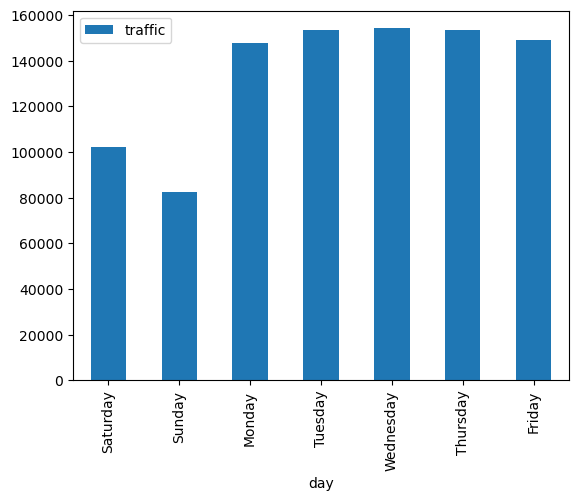

In [112]:
df_Test = df_station[df_station["station"] == "42 ST-PORT AUTH"]
df_Test
df_Test.plot.bar(x="day", y="traffic");

### Exercise

- What are the 3 busiest stations on average?
- What is the traffic distribution over the week?
- What are the busiest stations on weekends and on weekdays?

### Exercise

Write a script that imports each weekly file http://web.mta.info/developers/turnstile.html and merges them.

# Common issues

In [113]:
xx = [2, 4, 6, '8']
df = pd.DataFrame(xx)
df.columns = ["X"]
df.head()

X
0  2
1  4
2  6
3  8

In [114]:
df["Mult"] = 2.*df["X"]

TypeError: can't multiply sequence by non-int of type 'float'

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


In [116]:
df['X'] = pd.to_numeric(df['X'])
df["Mult"] = 2.*df["X"]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       4 non-null      int64  
 1   Mult    4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


In [118]:
df.head()

X  Mult
0  2   4.0
1  4   8.0
2  6  12.0
3  8  16.0

### Working with copies

In [119]:
N = 5
xx = np.random.standard_normal((N, 5))
df = pd.DataFrame(xx)
df2 = df ### same as df.copy(deep=False)
df3 = df.copy(deep=True)

In [120]:
i,j = 0,1
df.iat[i,j] = 2.
print(df.iat[i,j], df2.iat[i,j])

2.0 2.0


# Extra: Combining DataFrames and creating signals

In [121]:
aapl = pd.read_csv("data/apple.csv")
amzn = pd.read_csv("data/AMZN.csv")

In [122]:
aapl.index = aapl["Date"]
del aapl["Date"]
aapl.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2018-12-12  171.919998  169.020004  170.399994  169.100006  35627700.0   
2018-12-13  172.570007  169.550003  170.490005  170.949997  31898600.0   
2018-12-14  169.080002  165.279999  169.000000  165.479996  40703700.0   
2018-12-17  168.350006  162.729996  165.449997  163.940002  44287900.0   
2018-12-18  167.529999  164.389999  165.380005  166.070007  33795000.0   

             Adj Close  
Date                    
2018-12-12  169.100006  
2018-12-13  170.949997  
2018-12-14  165.479996  
2018-12-17  163.940002  
2018-12-18  166.070007

In [123]:
amzn.index = amzn["Date"]
del amzn["Date"]
amzn.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-12-17  3250.000000  3263.510010  3221.000000  3236.080078  3236.080078   
2020-12-18  3243.989990  3249.419922  3171.600098  3201.649902  3201.649902   
2020-12-21  3200.010010  3226.969971  3166.000000  3206.179932  3206.179932   
2020-12-22  3202.840088  3222.000000  3180.080078  3206.520020  3206.520020   
2020-12-23  3205.000000  3210.129883  3184.169922  3185.270020  3185.270020   

             Volume  
Date                 
2020-12-17  3474300  
2020-12-18  5995700  
2020-12-21  3836800  
2020-12-22  2369400  
2020-12-23  2088100

In [124]:
df = pd.merge(amzn, aapl, on="Date")
df.tail()

Open_x       High_x       Low_x      Close_x  Adj Close_x  \
Date                                                                    
2018-12-12  1669.0  1704.989990  1660.27002  1663.540039  1663.540039   
2018-12-13  1680.0  1692.119995  1641.50000  1658.380005  1658.380005   
2018-12-14  1638.0  1642.569946  1585.00000  1591.910034  1591.910034   
2018-12-17  1566.0  1576.130005  1505.01001  1520.910034  1520.910034   
2018-12-18  1540.0  1567.550049  1523.01001  1551.479980  1551.479980   

            Volume_x      High_y       Low_y      Open_y     Close_y  \
Date                                                                   
2018-12-12   6598000  171.919998  169.020004  170.399994  169.100006   
2018-12-13   5271300  172.570007  169.550003  170.490005  170.949997   
2018-12-14   6367200  169.080002  165.279999  169.000000  165.479996   
2018-12-17   8829800  168.350006  162.729996  165.449997  163.940002   
2018-12-18   6523000  167.529999  164.389999  165.380005  166.070007   

              Volume_y  Adj Close_y  
Date                                 
2018-12-12  35627700.0   169.100006  
2018-12-13  31898600.0   170.949997  
2018-12-14  40703700.0   165.479996  
2018-12-17  44287900.0   163.940002  
2018-12-18  33795000.0   166.070007

In [125]:
df = pd.merge(amzn["Close"], aapl["Close"], on="Date")
df.columns = ["amzn", "aapl"]
df.head()

amzn        aapl
Date                              
2015-12-24  662.789978  108.029999
2015-12-28  675.200012  106.820000
2015-12-29  693.969971  108.739998
2015-12-30  689.070007  107.320000
2015-12-31  675.890015  105.260002

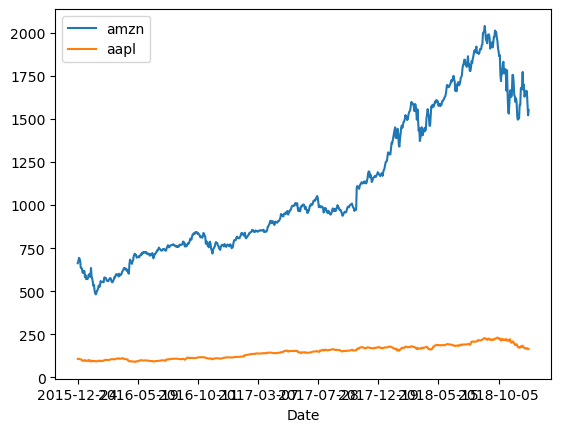

In [126]:
df.plot();

#### Normalised versions...

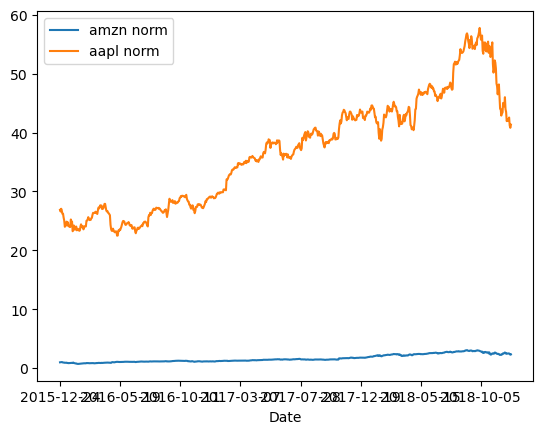

In [127]:
aapl0 = aapl.iloc[0,0]
amzn0 = amzn.iloc[0,0]

amzn_norm = amzn / amzn0
aapl_norm = aapl / aapl0
df_norm = pd.merge(amzn_norm["Close"], aapl_norm["Close"], on="Date")
df_norm.columns = ["amzn norm", "aapl norm"]
df_norm.plot();

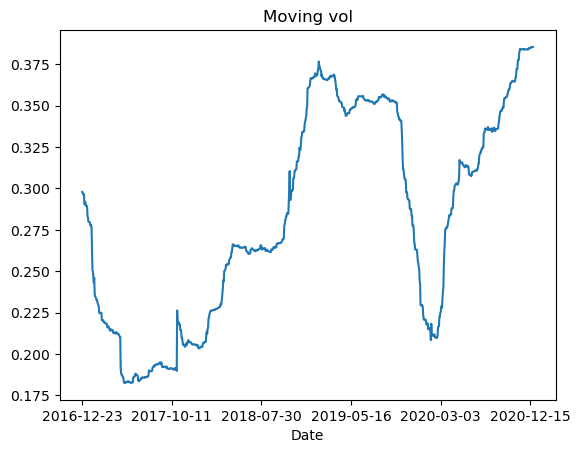

In [128]:
amzn["Returns"] = np.log(amzn['Close'] / amzn['Close'].shift(1))
amzn['MovingVol'] = amzn['Returns'].rolling(window=252).std() * np.sqrt(252.)
amzn = amzn[["Close", "Returns", "MovingVol"]]
amzn = amzn.dropna()
amzn["MovingVol"].plot(title="Moving vol");

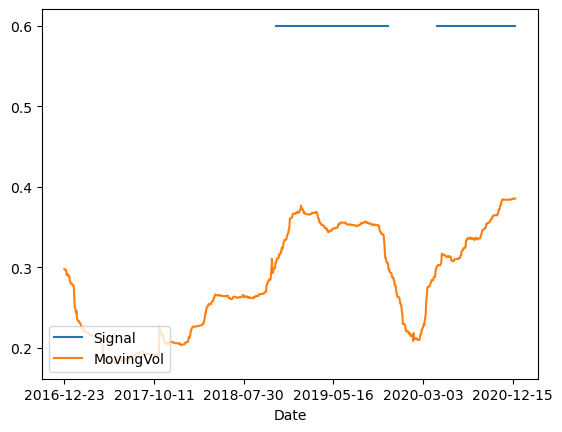

In [129]:
maxVolAllowed = 0.3
amzn.loc[amzn['MovingVol'] > maxVolAllowed, 'Signal'] = 0.6#coke["MovingVol"].max()
amzn[["Signal", "MovingVol"]].plot().legend(loc=3);

# WARNINGS: Data inconsistencies

- Missing data
- NaN, -1, ...
- Date format
- Blank spaces
- Formats: Int, float, ...